<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson2/GB_NN_intro_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [9]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Label is 3
Label is 3
Label is 7


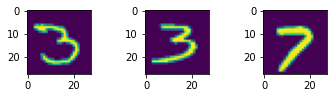

In [12]:
for i in range(3):
  ind = np.random.randint(0, train_images.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[ind])
  print(f'Label is {train_labels[ind]}')

In [13]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [14]:
input_size = train_images.shape[1]
# print(input_size)

In [15]:
def test_nn(train_images,
            train_labels,
            test_images,
            test_labels,
            n_layers: int = 2,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            optimizer: str = 'adam',
            n_epochs: int = 5,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

  # Build the model.

  model = Sequential()
  model.add(Dense(n1_neuron, input_shape=(input_size,), activation='relu'))
  # model.add(Dense(n2_neuron, activation='tanh'))
  # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
  if n_layers > 2: 
    for k in range(n_layers-2):
      model.add(Dense(n2_neuron, activation='tanh'))

  # выходной слой.
  model.add(Dense(10, activation='softmax'))


  # Compile the model.
  model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=n_epochs,
  batch_size=batch_size,
  validation_split=validation_split,
  verbose=verbose
  )

  # Evaluate the model.
  model.evaluate(
  test_images,
  to_categorical(test_labels)
  )

  return history.history

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [16]:
res_dict={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict[n_neurons] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9765


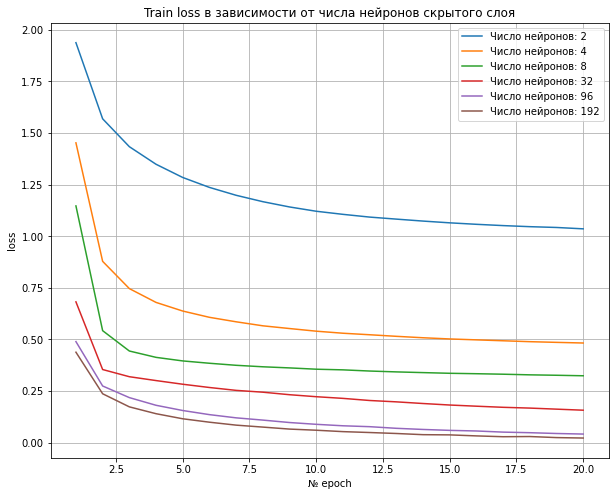

In [17]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

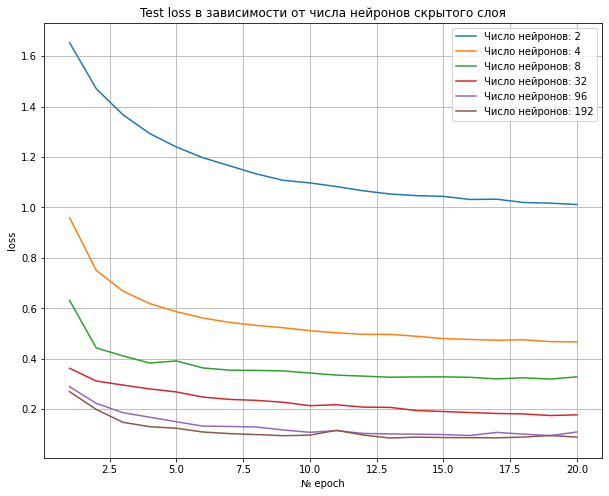

In [18]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя')
plt.show()

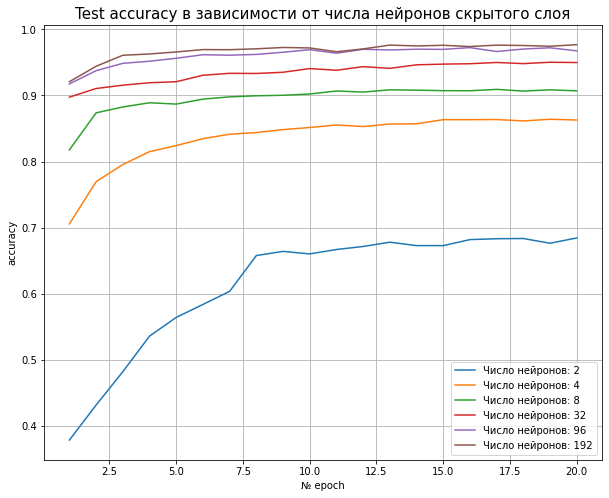

In [19]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_accuracy'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

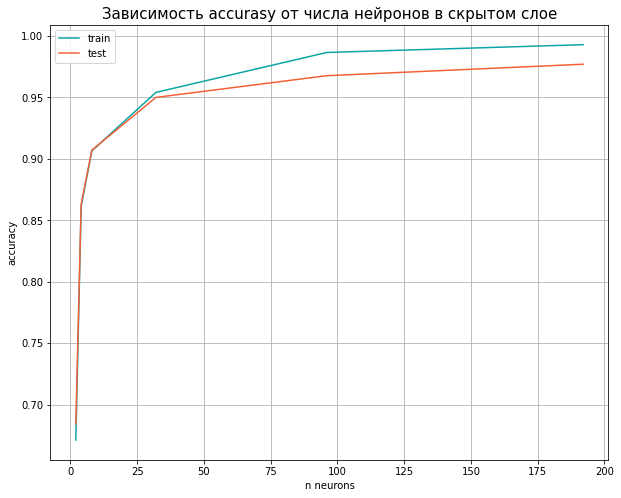

In [20]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict[n_neur]['accuracy'][19] for n_neur in res_dict]
res_test = [res_dict[n_neur]['val_accuracy'][19] for n_neur in res_dict]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Увеличение числа нейронов в скрытом слое двухслойной сети увеличивает качество модели. Впрочем, существует предел улучшения.

## **Провeрка обучения с разным количеством скрытых слоев**

In [21]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_2 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_2[n] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9648


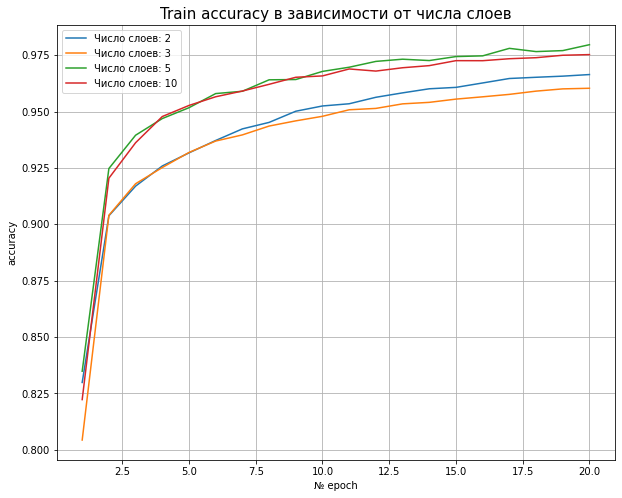

In [22]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

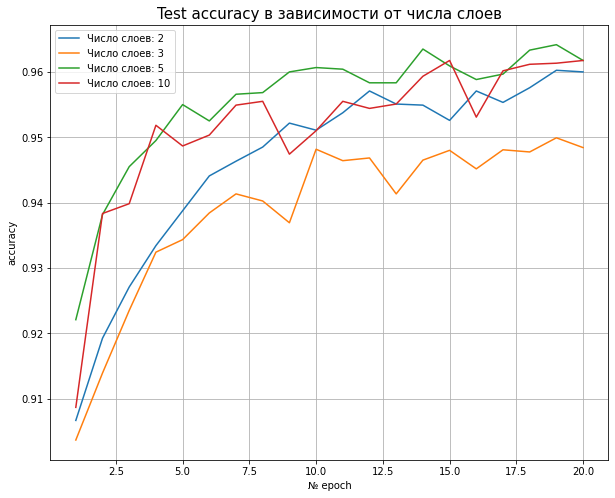

In [23]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев',size=15)
plt.show()

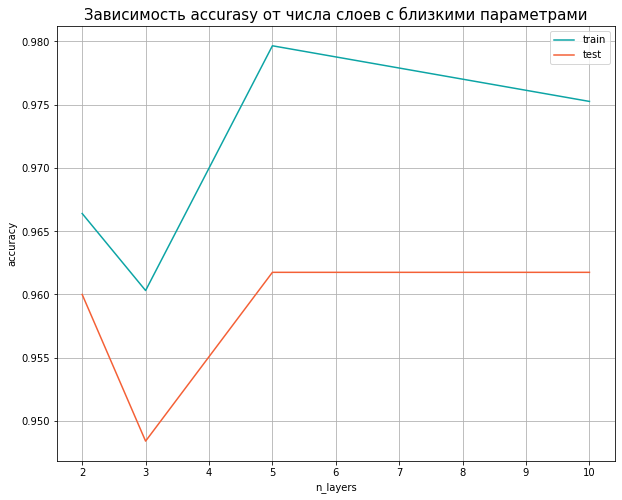

In [24]:
# n_layers = [2, 3, 5, 10]
res_train = [res_dict_2[n_lay]['accuracy'][19] for n_lay in res_dict_2]
res_test = [res_dict_2[n_lay]['val_accuracy'][19] for n_lay in res_dict_2]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

При создании слоёв с одинаковыми параметрами лучше всего показала себя сеть с 5 слоями. Впрочем, и 3 и 10 слоёв также показали себя достаточно хорошо.

## Провeрка обучения с разными оптимизаторами
(Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.)

In [25]:
res_dict_3 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_3[optim] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9652


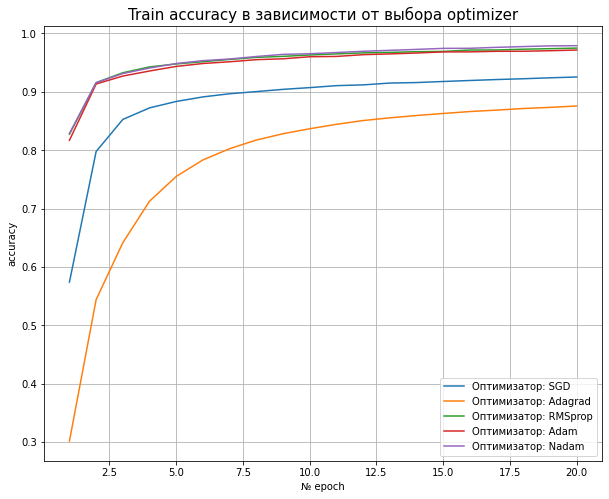

In [26]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

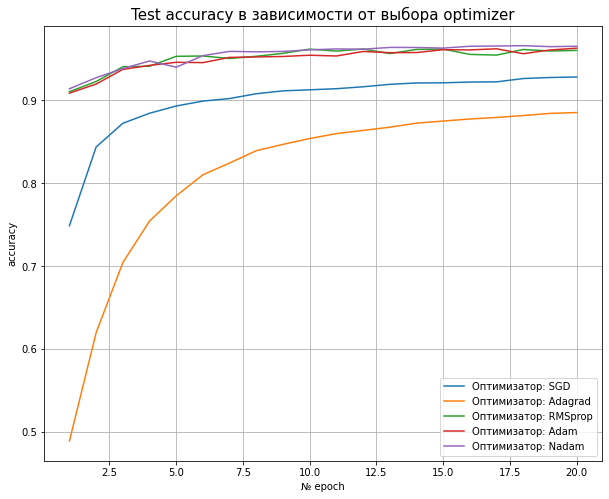

In [27]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['val_accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от выбора optimizer', size=15)
plt.show()

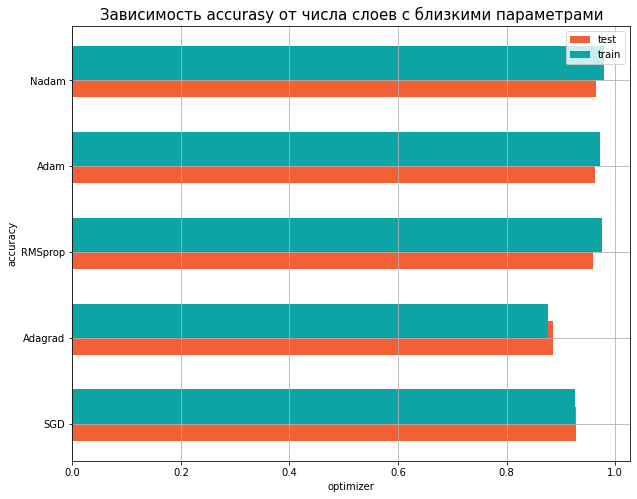

In [28]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_3[optim]['accuracy'][19] for optim in res_dict_3]
res_test = [res_dict_3[optim]['val_accuracy'][19] for optim in res_dict_3]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Хуже всего показали себя оптимизаторы adagrad и sgd. Остальные показали примерно равные результаты.


In [29]:
model_fin = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin.compile(loss='categorical_crossentropy', 
                optimizer='Nadam', 
                metrics=['accuracy'])

mod = model_fin.fit(train_images, to_categorical(train_labels),
                  epochs=40,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod.history

{'loss': [0.4538930654525757,
  0.2178025096654892,
  0.15632086992263794,
  0.12245456874370575,
  0.10099127143621445,
  0.0828513503074646,
  0.06992215663194656,
  0.061045072972774506,
  0.05190552398562431,
  0.04530034214258194,
  0.03927459567785263,
  0.033751051872968674,
  0.030765492469072342,
  0.02552228979766369,
  0.02214071899652481,
  0.020992890000343323,
  0.019160808995366096,
  0.01576945185661316,
  0.015371046960353851,
  0.015816740691661835,
  0.013596229255199432,
  0.01185322180390358,
  0.015072355046868324,
  0.00909444410353899,
  0.01036263071000576,
  0.012888246215879917,
  0.010321383364498615,
  0.013212993741035461,
  0.008625734597444534,
  0.009983154013752937,
  0.00815074797719717,
  0.012604307383298874,
  0.009818430989980698,
  0.004568136762827635,
  0.014840752817690372,
  0.007690822705626488,
  0.003848951542750001,
  0.0026682643219828606,
  0.0009224375244230032,
  0.000399186450522393],
 'accuracy': [0.8689791560173035,
  0.93518751859

In [30]:
print(f"Метрика на train: {max(mod.history['accuracy'])}", 
      f"Метрика на test: {max(mod.history['val_accuracy'])}", sep="\n")

Метрика на train: 1.0
Метрика на test: 0.9767500162124634


In [31]:
N = 5
y_pred = model_fin.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [32]:
y_test = to_categorical(test_labels)

In [33]:
y_test_labels = np.argmax(y_test, axis=1)

In [34]:
test_confusion_matrix = confusion_matrix(y_test_labels, y_pred_class)
print(test_confusion_matrix)

[[ 971    0    1    0    0    0    4    1    2    1]
 [   0 1124    2    2    0    2    1    1    3    0]
 [   6    3 1007    3    2    0    2    5    4    0]
 [   0    0    4  991    0    2    0    3    5    5]
 [   0    1    2    0  963    0    4    2    0   10]
 [   4    2    0    8    1  864    6    1    3    3]
 [   2    2    0    1    4    5  941    1    2    0]
 [   1    6    7    3    1    0    0 1004    2    4]
 [   4    1    3    7    3    8    2    4  941    1]
 [   2    2    0    8    8    1    1    8    3  976]]


In [35]:
print(classification_report(y_test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Задание 2.

Используем набор примеров fashion-MNIST

1) Опишите - какой результат нейросети получен в зависимости от:

* числа нейронов в слое (для 2-х слойной сети),

* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

* фиксируйте для тренировочного и тестового набора метрики accuracy.

In [36]:
from keras.datasets import fashion_mnist

In [37]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


In [38]:
X_train.min(), X_train.max()

(0, 255)

In [39]:
classes = {'0': 'T-shirt/top',
           '1': 'Trouser',
           '2': 'Pullover',
           '3': 'Dress',
           '4': 'Coat',
           '5': 'Sandal',
           '6': 'Shirt',
           '7': 'Sneaker',
           '8': 'Bag',
           '9': 'Ankle boot'}

Label is 8
Label is 3
Label is 3


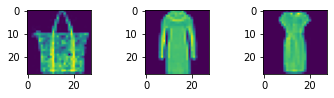

In [40]:
for i in range(3):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[ind])
  print(f'Label is {y_train_labels[ind]}')

In [41]:
# Normalize the images.
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

print(X_train.min(), X_train.max())

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)

0.0 1.0
(60000, 784)
(10000, 784)


In [42]:
input_size = X_test.shape[1]

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [43]:
res_dict_4={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict_4[n_neurons] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8845


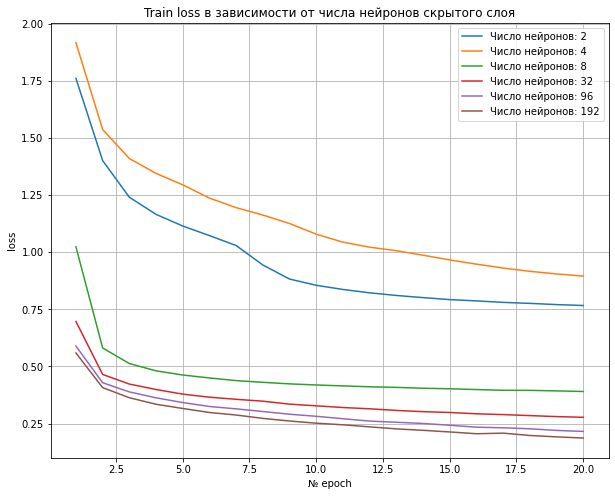

In [44]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

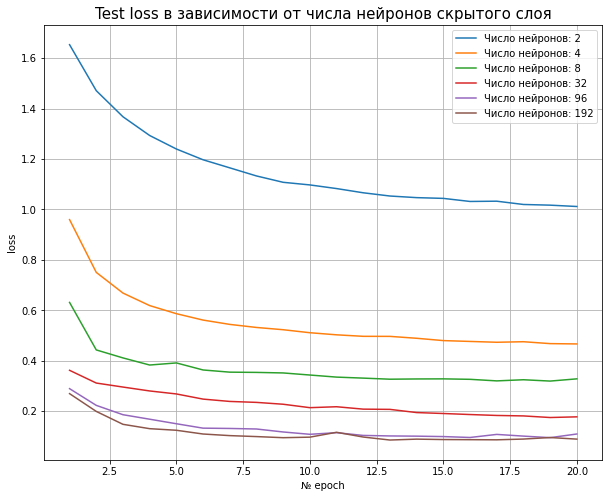

In [45]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

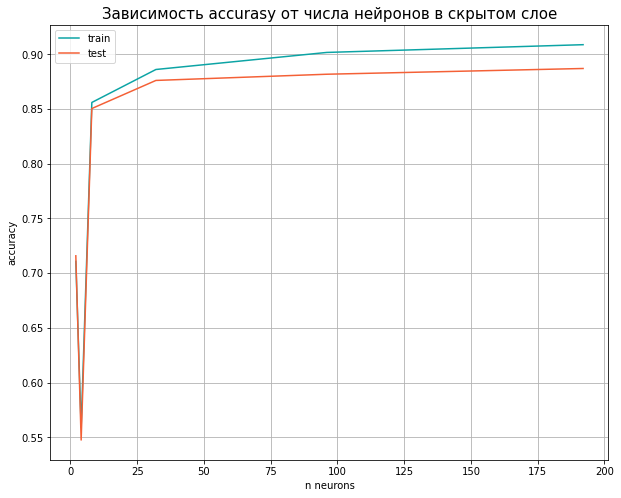

In [46]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict_4[n_neur]['accuracy'][10] for n_neur in res_dict_4]
res_test = [res_dict_4[n_neur]['val_accuracy'][10] for n_neur in res_dict_4]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## **Проверка обучения с разным количеством скрытых слоев**

In [47]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_5 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_5[n] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8679


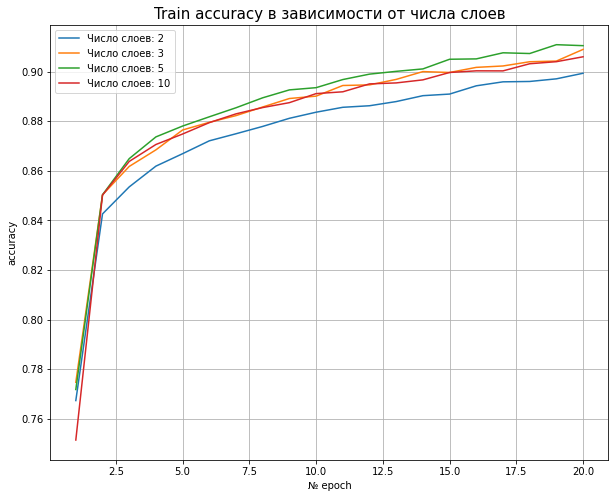

In [48]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

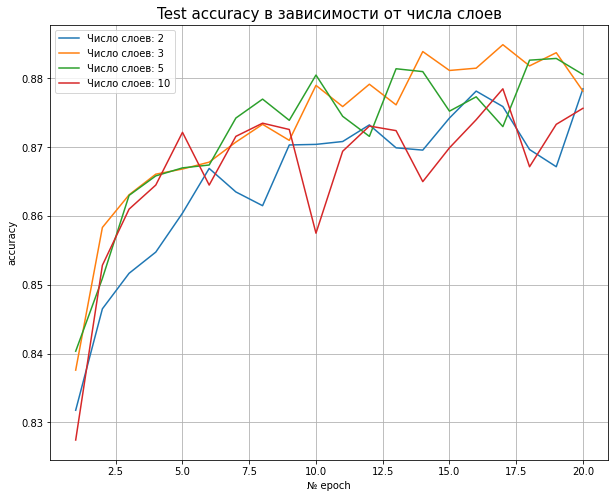

In [49]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев', size=15)
plt.show()

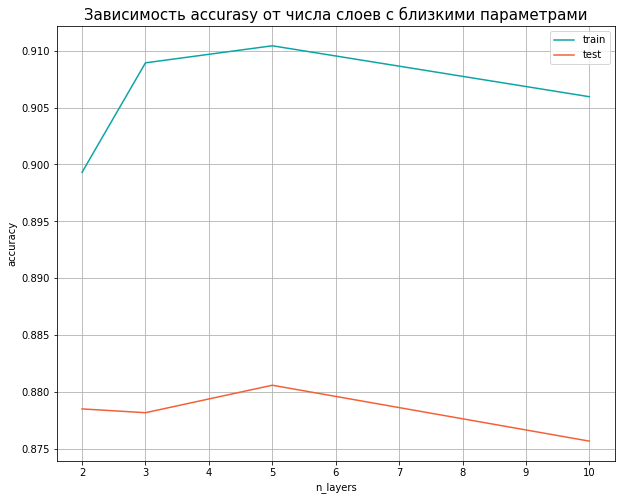

In [50]:
res_train = [res_dict_5[n_lay]['accuracy'][19] for n_lay in res_dict_5]
res_test = [res_dict_5[n_lay]['val_accuracy'][19] for n_lay in res_dict_5]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал вариант с пятью слоями. Т.е. увеличение количества слоёв улучшает характеристики, но существует оптимум.

## Провeрка обучения с разными оптимизаторами

2) Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [51]:
res_dict_6 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_6[optim] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8726


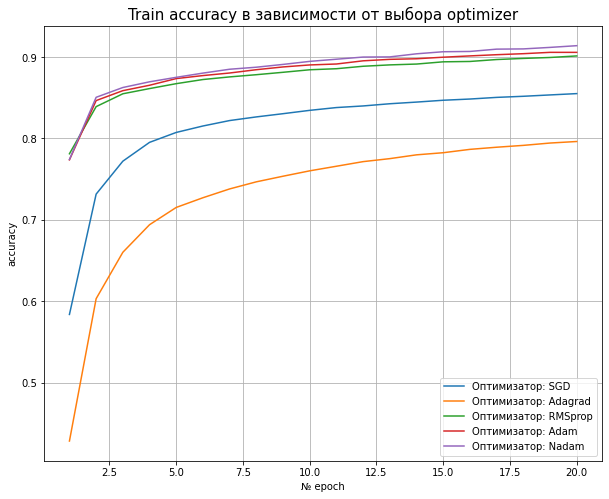

In [52]:
plt.figure(figsize=(10, 8))
for optim in res_dict_6:
        plt.plot(x, res_dict_6[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

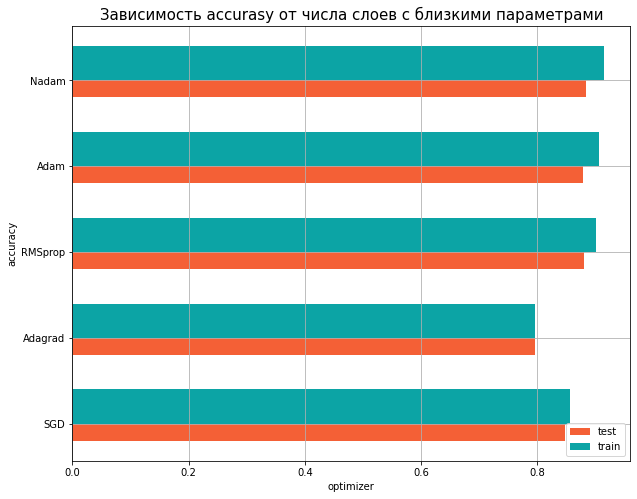

In [53]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_6[optim]['accuracy'][19] for optim in res_dict_6]
res_test = [res_dict_6[optim]['val_accuracy'][19] for optim in res_dict_6]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал оптимизатор Nadam

## Вывод по улучшению

3) Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Увеличение числа нейронов, выбор оптимизатора, увеличение числа эпох. Также существует зависимость от размера батчей.

## Матрица

4) Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [54]:
model_fin_2 = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin_2.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod_2 = model_fin_2.fit(X_train, to_categorical(y_train_labels),
                  epochs=20,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod_2.history

{'loss': [0.5569080114364624,
  0.3927672803401947,
  0.35875049233436584,
  0.33190980553627014,
  0.3144865930080414,
  0.2980988621711731,
  0.2837603688240051,
  0.2705411911010742,
  0.26057499647140503,
  0.2507324814796448,
  0.24188275635242462,
  0.23149418830871582,
  0.22751349210739136,
  0.21993488073349,
  0.21122083067893982,
  0.2045629471540451,
  0.1998288929462433,
  0.19183765351772308,
  0.18676063418388367,
  0.1845499873161316],
 'accuracy': [0.8062499761581421,
  0.8586249947547913,
  0.8703333139419556,
  0.8780208230018616,
  0.8837708234786987,
  0.89041668176651,
  0.8940208554267883,
  0.8992083072662354,
  0.9017083048820496,
  0.9074166417121887,
  0.9104583263397217,
  0.9145416617393494,
  0.9144166707992554,
  0.9190624952316284,
  0.9216874837875366,
  0.9236041903495789,
  0.925166666507721,
  0.9289166927337646,
  0.9302291870117188,
  0.9309583306312561],
 'val_loss': [0.4142274558544159,
  0.3749326467514038,
  0.36320996284484863,
  0.34896624088

In [55]:
print(f"Метрика на train: {max(mod_2.history['accuracy'])}", 
      f"Метрика на test: {max(mod_2.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9309583306312561
Метрика на test: 0.8897500038146973


In [56]:
N = 5
y_pred_2 = model_fin_2.predict(X_test)
y_pred_class_2 = np.argmax(y_pred_2, axis=1)

313/313 [==============================] - 1s 1ms/step


In [57]:
y_test_2 = to_categorical(y_test_labels)

In [58]:
y_test_labels_2 = np.argmax(y_test_2, axis=1)

In [59]:
test_confusion_matrix = confusion_matrix(y_test_labels_2, y_pred_class_2)
print(test_confusion_matrix)

[[827   2  15  51   3   0  98   0   4   0]
 [  2 968   2  24   2   0   2   0   0   0]
 [ 16   0 829  25  65   1  63   1   0   0]
 [ 11   5   6 942  12   0  19   0   5   0]
 [  2   1 108  55 770   0  62   0   2   0]
 [  0   0   0   1   0 926   0  32   4  37]
 [122   2  97  48  50   0 678   0   3   0]
 [  0   0   0   0   0   6   0 925   0  69]
 [  9   0   4  11   5   2   6   4 959   0]
 [  0   0   0   0   0   2   1  11   0 986]]


In [60]:
print(classification_report(y_test_labels_2, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.83      0.80      1000
           3       0.81      0.94      0.87      1000
           4       0.85      0.77      0.81      1000
           5       0.99      0.93      0.96      1000
           6       0.73      0.68      0.70      1000
           7       0.95      0.93      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.90      0.99      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [61]:
classification_report(y_test_labels_2, y_pred_class_2, 
                      output_dict=True, 
                      target_names=classes.values())

{'T-shirt/top': {'precision': 0.8361981799797775,
  'recall': 0.827,
  'f1-score': 0.8315736551030668,
  'support': 1000},
 'Trouser': {'precision': 0.9897750511247444,
  'recall': 0.968,
  'f1-score': 0.9787664307381194,
  'support': 1000},
 'Pullover': {'precision': 0.7813383600377003,
  'recall': 0.829,
  'f1-score': 0.804463852498787,
  'support': 1000},
 'Dress': {'precision': 0.8141745894554884,
  'recall': 0.942,
  'f1-score': 0.8734353268428373,
  'support': 1000},
 'Coat': {'precision': 0.8489525909592062,
  'recall': 0.77,
  'f1-score': 0.8075511274252754,
  'support': 1000},
 'Sandal': {'precision': 0.9882604055496265,
  'recall': 0.926,
  'f1-score': 0.9561177077955603,
  'support': 1000},
 'Shirt': {'precision': 0.7298170075349839,
  'recall': 0.678,
  'f1-score': 0.7029548989113531,
  'support': 1000},
 'Sneaker': {'precision': 0.9506680369989723,
  'recall': 0.925,
  'f1-score': 0.937658388241257,
  'support': 1000},
 'Bag': {'precision': 0.9815762538382804,
  'recall': 